## Visualization of convergence of random variables

In this notebook, we will visualize
+ the weak law of large numbers
+ the central limit theorem

In [2]:
import numpy as np
import matplotlib.pyplot as plt


#Some code to beautify the plots
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

In [3]:
from scipy.stats import binom, bernoulli, norm

nsamples = 100
rv = bernoulli.rvs(0.5, size=(nsamples,10**3))

cumavg = np.cumsum(rv, axis = 1)/(np.arange(rv.shape[1])+1)

### One experiment

We toss a fair coin 10,000 times. As we're tossing this coin, we record the fraction of tosses that result in heads. We expect that on average this fraction should be $0.5$. 

Text(0.5, 1.0, 'Sample mean for one experiment')

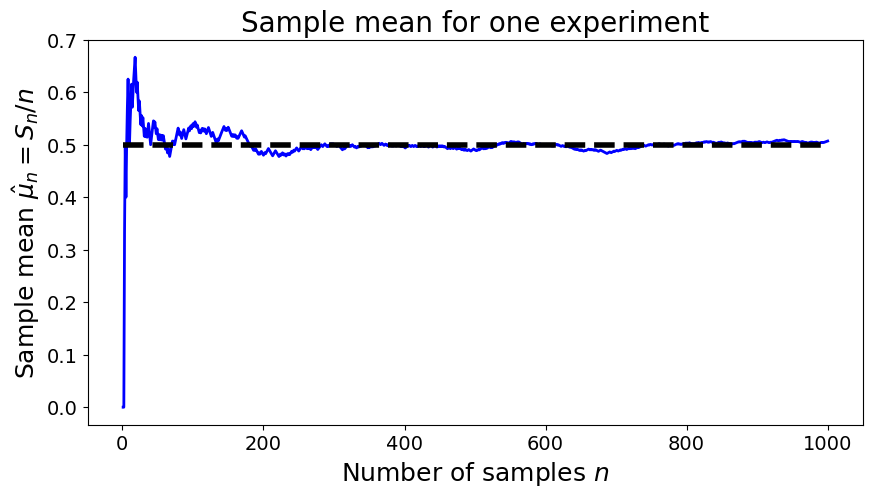

In [4]:
f,ax = plt.subplots(1,1, figsize = (10,5))
plt.plot(np.arange(rv.shape[1])+1, cumavg[0,:].T, 'b', lw =2.0)
plt.plot(np.arange(rv.shape[1])+1, 0.5*np.ones(rv.shape[1],), 'k--', lw = 4.)
plt.xlabel('Number of samples $n$', fontsize = 18)
plt.ylabel('Sample mean $\\hat\\mu_n = S_n/n$', fontsize = 18)
plt.title('Sample mean for one experiment', fontsize = 20)


#### Sample variance

Text(0.5, 1.0, 'Sample variance')

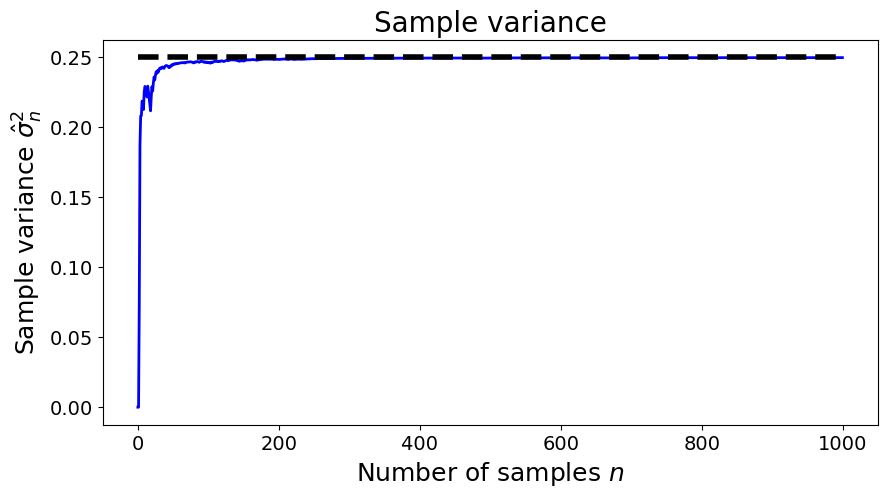

In [5]:
def cumvar(x):
    # Two pass formula
    cm = np.cumsum(x)/(np.arange(x.shape[0])+1)
    
    cv = np.zeros(x.shape[0])
    for n in range(1,x.shape[0]+1):
        cv[n-1] += np.sum((x[:n-1]-cm[n-1])**2.)/n
    return cv




x = rv[0,:]
cv = cumvar(x)
f,ax = plt.subplots(1,1, figsize = (10,5))
plt.plot(np.arange(x.shape[0]), cv, 'b', lw =2.0)
plt.plot(np.arange(x.shape[0]), 0.25*np.ones(x.shape[0],), 'k--', lw = 4.)
plt.xlabel('Number of samples $n$', fontsize = 18)
plt.ylabel(f'Sample variance $\\hat\\sigma_n^2$', fontsize = 18)
plt.title('Sample variance', fontsize = 20)


### Multiple experiments

Now we repeat this experiment $100$ times. The Weak Law of Large Numbers (WLLN) says that the sample mean
$$ \hat\mu_n = \frac{S_n}{n},$$
which counts the fraction of heads that land, satisfies 
$$ \lim_{n\rightarrow \infty} P\left( \left| \hat\mu_n-0.5\right|  <\epsilon \right) = 1.$$

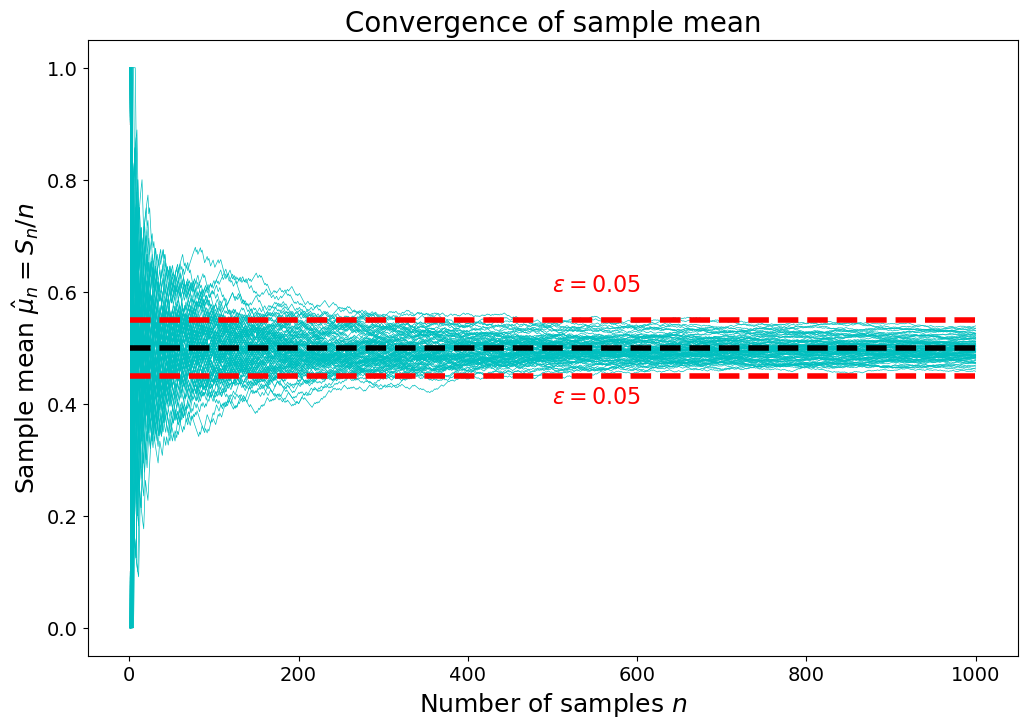

In [6]:
f, ax = plt.subplots(1,1, figsize = (12,8))
plt.plot(np.arange(rv.shape[1])+1, cumavg.T, 'c', lw =0.5)
plt.plot(np.arange(rv.shape[1])+1, 0.5*np.ones(rv.shape[1],), 'k--', lw = 4.)
plt.plot(np.arange(rv.shape[1])+1, 0.55**np.ones(rv.shape[1],), 'r--', lw = 4.)
plt.plot(np.arange(rv.shape[1])+1, 0.45**np.ones(rv.shape[1],), 'r--', lw = 4.)
plt.text(500, 0.6, '$\\epsilon = 0.05$', color = 'r', fontsize = 16)
plt.text(500, 0.4, '$\\epsilon = 0.05$', color = 'r', fontsize = 16)
plt.xlabel('Number of samples $n$', fontsize = 18)
plt.ylabel('Sample mean $\\hat\\mu_n = S_n/n$', fontsize = 18)
plt.title('Convergence of sample mean', fontsize = 20)
plt.savefig('wlln.eps')

The WLLN says: fix an $\epsilon > 0$, then for some $n$ sufficiently high and with high probability, all the experiments will be within $\epsilon$ of the true mean. 

## Central limit theorem

The WLLN says that the sample mean converges to the true mean but does not say anything about the distribution of the sample mean. The Central Limit Theorem says: as $n \rightarrow \infty$ 
    
   $$ P\left( \sqrt{n}\, \frac{\hat\mu_n - 0.5}{\sqrt{0.25}} \leq a\right) \rightarrow \Phi(a), $$

where 
$$\Phi(a) :=  \int_{-\infty}^a\frac{1}{\sqrt{2\pi}}e^{-z^2/2} dz.$$
    
That is, if $n$ is sufficiently large, the sample mean $\hat\mu_n$ behaves as a normal random variable with mean $0.5$ and variance $0.25/n$.

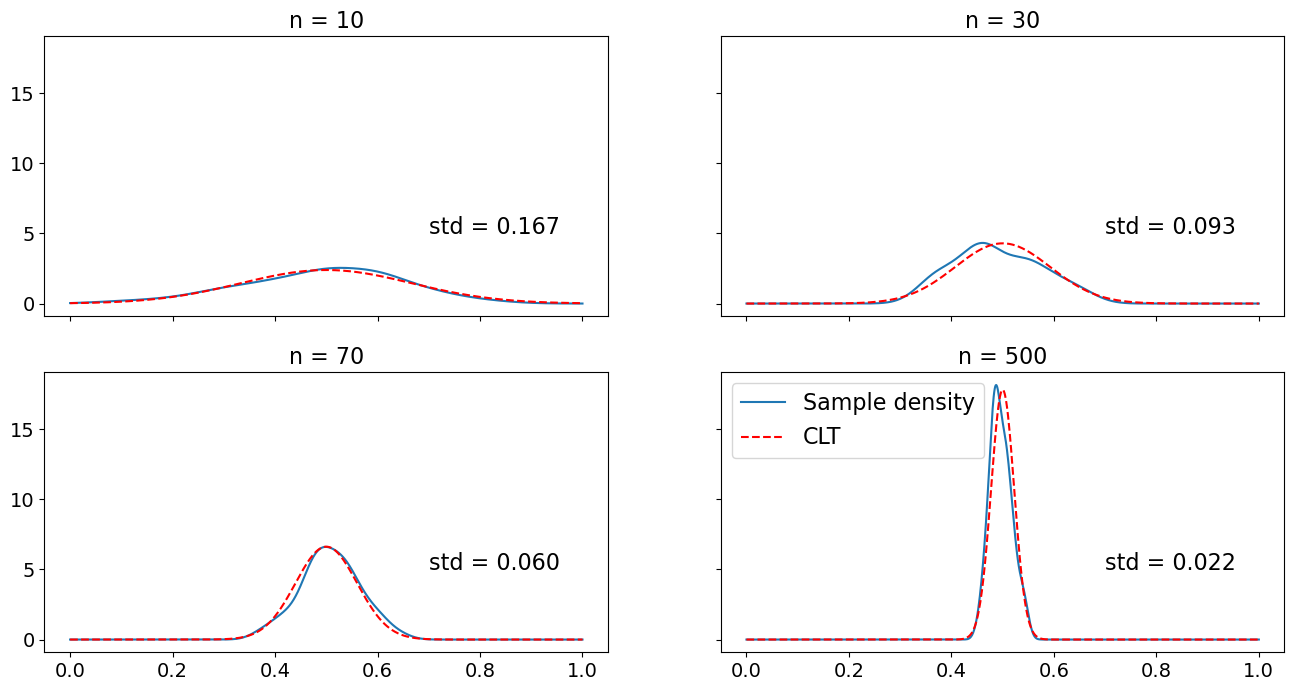

In [7]:
from scipy.stats import gaussian_kde


xgrid = np.linspace(0, 1., 1000)
f, axs = plt.subplots(2, 2, sharex = True, sharey = True, figsize = (16,8))
                   
ind = [10,30,70, 500]
for j, ax in zip(range(len(ind)),axs.flatten()):
    x = cumavg[:,ind[j]-1].flatten()
    
    # Plot kernel density estimate
    kde = gaussian_kde(x)
    ax.plot(xgrid, kde.evaluate(xgrid))
    
    std = np.sqrt(0.25/float(ind[j]-1))
    ax.text(0.7, 5,'std = %0.3f'%(std), fontsize = 16)
    ax.plot(xgrid, norm.pdf(xgrid, 0.5, std ), 'r--')
    ax.set_title('n = %d' % (ind[j]), fontsize = 16)
    if j == 3: ax.legend(('Sample density', 'CLT'), fontsize = 16, loc = 'upper left')

In [8]:
print(rv.shape)

(100, 1000)
